In [1]:
# Importação de Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Leitura de Dados no formato .CSV
df_spc = pd.read_csv("novo_dataset.csv")
df_spc.head() # primeiros 5 registros

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,TIPO_PESSOA,CIDADE,ESTADO,LOGRADOURO,ANO,MES,DIA,HORA,IDADE,FAIXA ETARIA
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00",3104.0,-4.847580,-37.784390,CPF,Jaguaruana,Ceará,street_address,1981.0,1.0,30.0,0.0,40.0,30 a 40 anos
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00",5703.0,-26.990118,-48.637165,CPF,Balneário Camboriú,Santa Catarina,street_address,1978.0,1.0,28.0,0.0,43.0,40 a 50 anos
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-09-12,"DE R$ 3.800,00 A R$ 7.600,00",3901.0,-5.053671,-42.813152,CPF,Teresina,Piauí,street_address,1954.0,9.0,12.0,0.0,67.0,60 a 70 anos
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28,"DE R$ 788,00 A R$ 1.140,00",1086.0,-15.059042,-48.163372,CNPJ,Mimoso de Goiás,Goiás,establishment,1975.0,8.0,28.0,0.0,46.0,40 a 50 anos
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17,"DE R$ 788,00 A R$ 1.140,00",836.0,-17.694658,-42.522280,CPF,Capelinha,Minas Gerais,street_address,1957.0,6.0,17.0,0.0,64.0,60 a 70 anos


In [27]:
df_spc["LATLONG"] = df_spc["LATITUDE"].astype(str) + df_spc["LONGITUDE"].astype(str)
df_spc["LATLONG"] 

0              -4.84758-37.78439
1       -26.99011814-48.63716523
2       -5.053671016-42.81315203
3           -15.059042-48.163372
4            -17.694658-42.52228
                  ...           
9995    -11.60937194-47.04750645
9996    -15.65049668-47.79332059
9997    -8.330678649-36.13689703
9998                      nannan
9999        -15.787504-48.139096
Name: LATLONG, Length: 10000, dtype: object

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
state_encoder = LabelEncoder()
state_encoder.fit(df_spc['RENDA'].unique())
df_spc['RENDA'] = state_encoder.transform(df_spc['RENDA'])
df_spc['RENDA'].unique()

array([0, 1, 2, 3])

In [28]:
state_encoder = LabelEncoder()
state_encoder.fit(df_spc['LATLONG'].unique())
df_spc['LATLONG'] = state_encoder.transform(df_spc['LATLONG'])
df_spc['LATLONG'].unique()

array([7423, 5679, 7449, ..., 1079, 8171, 1121])

In [5]:
df_spc['ANO']=df_spc['ANO'].astype(str)
df_spc['MES']=df_spc['MES'].astype(str)
df_spc['DIA']=df_spc['DIA'].astype(str)
df_spc['HORA']=df_spc['HORA'].astype(str)
df_spc['IDADE']=df_spc['IDADE'].astype(str)
df_spc['RENDA_FIXA']=df_spc['RENDA_FIXA'].astype(str)

In [6]:
df_spc.dtypes

ID_USUARIO          object
DATA_NASCIMENTO     object
RENDA                int32
RENDA_FIXA          object
LATITUDE           float64
LONGITUDE          float64
TIPO_PESSOA         object
CIDADE              object
ESTADO              object
LOGRADOURO          object
ANO                 object
MES                 object
DIA                 object
HORA                object
IDADE               object
FAIXA ETARIA        object
dtype: object

In [29]:
df_novo=df_spc[['RENDA','LATLONG']]
df_novo

,RENDA,LATLONG
0,0,7423
1,1,5679
2,1,7449
3,2,978
4,2,1594
...,...,...
9995,0,423
9996,1,1079
9997,2,8171
9998,2,8510


In [45]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(df_novo)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 73493708993.52936
2 17086970862.529764
3 7255161438.71006
4 3941307078.4651527
5 2462567758.149451
6 1684604191.7084136
7 1216749514.8451908
8 918730072.502332
9 719663741.5318749
10 580413215.3187206


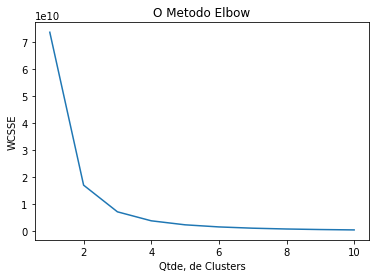

In [46]:
# Plotagem do Gráfico para visualização do "cotovelo" - Método de Elbow
# Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [30]:
# Criação do modelo de Agrupamento (Clustering) usando K-Means
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans

KMeans(init='random', n_clusters=3)

In [31]:
# Treino do modelo com os Dados
kmeans.fit(df_novo)

KMeans(init='random', n_clusters=3)

In [32]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[8.99334443e-01, 7.78124348e+03],
       [8.08388942e-01, 4.69569431e+03],
       [8.64182322e-01, 1.55670588e+03]])

In [33]:
# Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)
kmeans.fit(df_novo)

KMeans(init='random', n_clusters=3)

In [34]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[8.09977757e-01, 4.69173880e+03],
       [8.98891967e-01, 7.77954294e+03],
       [8.63089732e-01, 1.55475979e+03]])

In [35]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(df_novo)
distance

array([[2733.23907775, 5869.21326934,  355.69354874],
       [ 989.23897599, 4125.21320805, 2099.69241663],
       [2759.23896428, 5895.21320738,  329.69242983],
       ...,
       [3481.23916114, 6617.21330338,  392.30913248],
       [3820.23914309, 6956.21329862,  731.30841553],
       [3568.76104732,  432.78681569, 6657.69241495]])

In [36]:
# Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([2, 0, 2, ..., 2, 2, 1])

In [37]:
# Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[8.09977757e-01, 4.68976104e+03],
       [8.63622339e-01, 1.55378679e+03],
       [8.98394241e-01, 7.77869241e+03]])

In [40]:
df_novo.iloc[:, 0],

(0       0
 1       1
 2       1
 3       2
 4       2
        ..
 9995    0
 9996    1
 9997    2
 9998    2
 9999    1
 Name: RENDA, Length: 10000, dtype: int32,)

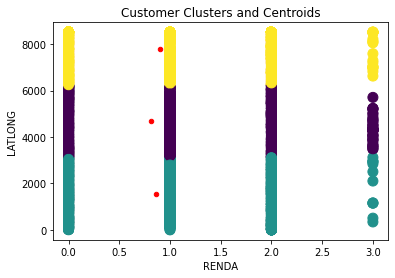

In [42]:
# Visualizando os Clusters - Exemplo 2
# Dados: 0.RENDA, 1.LATITUDE, 2.LONGITUDE
plt.scatter(df_novo.iloc[:, 0], df_novo.iloc[:, 1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('RENDA')
plt.ylabel('LATLONG')
plt.show()

In [48]:
# Para o cliente 1 => RENDA=1, LATITUDE=1, LONGITUDE=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=4
newcustomer1= [ [1, 1] ]
kmeans.predict(newcustomer1)

array([8])

In [49]:
# Para o cliente 2 => RENDA=1, LATITUDE=0, LONGITUDE=0, qual grupo ele pertence?
# O comando predict nos traz o cluster=2
newcustomer2 = [ [1, 0] ]
kmeans.predict(newcustomer2)

array([8])